# Problem statement
To build a CNN based model which can accurately detect melanoma. Melanoma is a type of cancer that can be deadly if not detected early. It accounts for 75% of skin cancer deaths. A solution which can evaluate images and alert the dermatologists about the presence of melanoma has the potential to reduce a lot of manual effort needed in diagnosis.

This assignment uses a dataset of about 2357 images of skin cancer types. The dataset contains 9 sub-directories in each train and test subdirectories. The 9 sub-directories contains the images of 9 skin cancer types respectively.

## Building a simple CNN model

#### **Task 1: Reading the data**

Importing all the important libraries

In [1]:
# Importing the required libraries
import pathlib
import os
import PIL

import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

You are expected to load the data in the Colab environment by mounting the Google Drive. This will allow you to access the files from Google drive through Colab. 

Steps:
1. Upload the dataset in your Google Drive in a separate folder. Avoid spaces in the name of the folder or the zip file.
2. Mount the Google Drive using the code given below.
3. Unzip the file to access images.
4. Check the path for the datasets - train and test.


Note: The code is commented for you to learn and then make edits to execute the command.

In [2]:
## If you are using the data by mounting the google drive, use the following:
from google.colab import drive
drive.mount('/content/gdrive')

## Ref:https://towardsdatascience.com/downloading-datasets-into-google-drive-via-google-colab-bcb1b30b0166

Mounted at /content/gdrive


In [58]:
# Your GDrive Directory
!ls /content/gdrive/MyDrive

 001.JPG
 002.JPG
 004.JPG
 009.jpg
 014.JPG
 033.JPG
 035.JPG
 066.JPG
 075.JPG
 083.JPG
 100.JPG
 104.JPG
 113.JPG
 122.jpg
 20210614104541.gdoc
 20210614104541.pdf
 chicago-application-form.pdf
'Colab Notebooks'
 image0001.tif
 IMG_1748.jpg
'In Harihar Nager Goal.mp3'
'Interview for Masters of Science in Machine Learning and Cloud with IITM and LJMU (eib-yxdd-sub - Aug 12, 2021).gjam'
'Moose Lake Jamboree Game Schedule.gdoc'
'Pradish Kuruvilla Mathew Stern Recom.gdoc'
'Pradish Mathew.gslides'
 rev-rpt-01-11.gsheet
'Saturn docs'
"saturnsys.com - Prethish Mathew's Dashboard Project Report.gsheet"
 stationsrailway.gmap
'Stock  Master.gsheet'
 Takeout
'Who are the patters and Raters (1).docx.gdoc'
'Who are the patters and Raters.docx.gdoc'
 wireframe.html
 www.prethish.com.gsite


In [3]:
# Unzipping the files
# To do: Update the folder name and file name
!unzip /content/gdrive/My\ 'Drive/Colab Notebooks/CNN_assignment.zip'

Archive:  /content/gdrive/My Drive/Colab Notebooks/CNN_assignment.zip
  inflating: Skin cancer ISIC The International Skin Imaging Collaboration/Test/actinic keratosis/ISIC_0010512.jpg  
  inflating: Skin cancer ISIC The International Skin Imaging Collaboration/Test/actinic keratosis/ISIC_0010889.jpg  
  inflating: Skin cancer ISIC The International Skin Imaging Collaboration/Test/actinic keratosis/ISIC_0024468.jpg  
  inflating: Skin cancer ISIC The International Skin Imaging Collaboration/Test/actinic keratosis/ISIC_0024470.jpg  
  inflating: Skin cancer ISIC The International Skin Imaging Collaboration/Test/actinic keratosis/ISIC_0024511.jpg  
  inflating: Skin cancer ISIC The International Skin Imaging Collaboration/Test/actinic keratosis/ISIC_0024646.jpg  
  inflating: Skin cancer ISIC The International Skin Imaging Collaboration/Test/actinic keratosis/ISIC_0024654.jpg  
  inflating: Skin cancer ISIC The International Skin Imaging Collaboration/Test/actinic keratosis/ISIC_0024707.

Check the path mentioned in the output: `Skin cancer ISIC The International Skin Imaging Collaboration`

Provide the path for train and test images using pathlib library.

In [4]:
# Defining the path for train and test images
## To do: Update the paths of the train and test dataset
data_dir_train = pathlib.Path("Skin cancer ISIC The International Skin Imaging Collaboration/Train")
data_dir_test = pathlib.Path('Skin cancer ISIC The International Skin Imaging Collaboration/Test')

Check whether the data has been extracted successfully.

In [5]:
# Train and test images
image_count_train = len(list(data_dir_train.glob('*/*.jpg')))
print("Train images:\t", image_count_train)
image_count_test = len(list(data_dir_test.glob('*/*.jpg')))
print("Test images:\t", image_count_test)

Train images:	 2239
Test images:	 118


#### **Task 2: Loading the images using keras.preprocessing**

The images are still not loaded in the Colab environment. We have extracted them from the zip file. Now, you are expected to load them in the Colab notebook using the `preprocessing` attribute.

Let's load these images off disk using the helpful image_dataset_from_directory utility. You can refer to the following [link](https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/image_dataset_from_directory) to know more about the function. You can even refer to the additional notebooks on the page to check how the variables are defined.



Defining the parameters for the loader:

In [6]:
batch_size = 32
img_height = 180
img_width = 180

Divide the training set into 2 parts: 
*   80% for training 
*   20% for validation



In [7]:
## Write your code for train dataset here.
## Note: Use seed=123 while creating your dataset using tf.keras.preprocessing.image_dataset_from_directory
## Note: Make sure you resize your images to the size: img_height*img_width, while specifying the variable

img_height = 180
img_width = 180

train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)
  

Found 2239 files belonging to 9 classes.
Using 1792 files for training.


In [8]:
## Write your code for validation dataset here.
## Note: Use seed=123 while creating your dataset using tf.keras.preprocessing.image_dataset_from_directory
## Note: Make sure you resize your images to the size: img_height*img_width, while specifying the variable

val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_test,
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 118 files belonging to 9 classes.


In [9]:
# List out all the classes of skin cancer and store them in a list. 
# You can find the class names in the 'class_names' attribute associated with the training and validation datasets. 
# These correspond to the directory names in alphabetical order.

class_names = train_ds.class_names
print(class_names)

['actinic keratosis', 'basal cell carcinoma', 'dermatofibroma', 'melanoma', 'nevus', 'pigmented benign keratosis', 'seborrheic keratosis', 'squamous cell carcinoma', 'vascular lesion']


#### **Task 3: Visualize the data**

The `image_batch` is a tensor of the shape `(32, 180, 180, 3)`. This is a batch of 32 images of shape `180x180x3` (the last dimension refers to color channels RGB). The `label_batch` is a tensor of the shape `(32,)`, these are corresponding labels to the 32 images.

Write the code to visualize one instance of all the nine classes present in the dataset

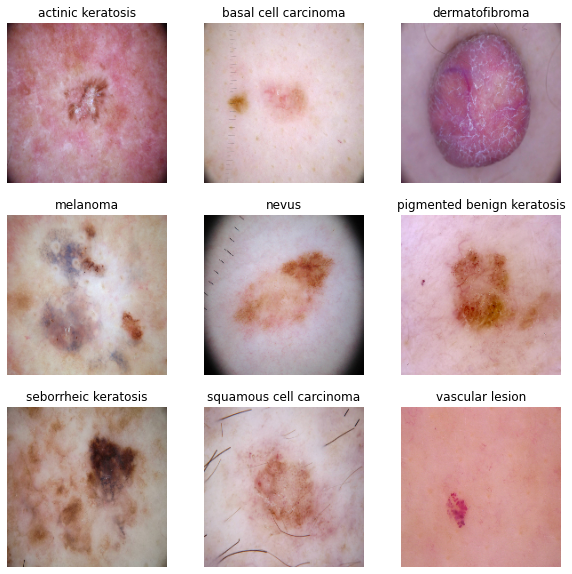

In [10]:
import matplotlib.pyplot as plt


### Your code goes here; you can use either training or validation data to visualize the images.
import matplotlib.pyplot as plt

plt.figure(figsize = (10,10))
for i in range(len(class_names)):
    filtered_ds = train_ds.filter(lambda x, l: tf.math.equal(l[0], i))  
    for image, label in filtered_ds.take(1):
        ax = plt.subplot(3, 3, i+1)
        plt.imshow(image[0].numpy().astype('uint8'))
        plt.title(class_names[label.numpy()[0]])
        plt.axis('off')

#### Configure the dataset for performance
Let's make sure to use buffered prefetching so you can yield data from disk without having I/O become blocking. These are two important methods you should use when loading data.

`Dataset.cache()` keeps the images in memory after they're loaded off disk during the first epoch. This will ensure the dataset does not become a bottleneck while training your model. If your dataset is too large to fit into memory, you can also use this method to create a performant on-disk cache.

`Dataset.prefetch()` overlaps data preprocessing and model execution while training.

In [11]:
AUTOTUNE = tf.data.experimental.AUTOTUNE

train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

#### **Task 4: Create the model**
Create a CNN model, which can accurately detect 9 classes present in the dataset. 


*   Note: The RGB channel values are in the `[0, 255]` range. This is not ideal for a neural network. Here, it is good to standardize values to be in the `[0, 1]`. Use `layers.experimental.preprocessing.Rescaling` for this purpose.

In [12]:
### Your code goes here
model = Sequential()

# Rescaling Layer
model.add(tf.keras.layers.experimental.preprocessing.Rescaling(1./255, input_shape=(180, 180, 3)))

# Convolution and Pooling layers
model.add(layers.Conv2D(32, (3, 3), strides=(3,3), padding='valid', activation='relu'))
model.add(layers.Conv2D(64, (3, 3), strides=(3,3), padding='valid',activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

# Flattening and Dense layers
model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))

# Adding the output layer
model.add(layers.Dense(10, activation='softmax'))

# Model summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 180, 180, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 60, 60, 32)        896       
                                                                 
 conv2d_1 (Conv2D)           (None, 20, 20, 64)        18496     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 10, 10, 64)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 6400)              0         
                                                                 
 dense (Dense)               (None, 128)               819328    
                                                        

#### **Question**: 
Explain the following elements associated with the problem:
1.   Selection of stride value (Reason for using a high/low value)
2.   Padding strategy used (Same/Valid)

**Strides Reasoning : ** Since neighboring pixels are strongly correlated (specially in lowest layers), it makes sense to reduce the size of the output by subsampling (pooling) the filter response. The further apart two pixels are from each other, the less correlated. Therefore, a big stride in the pooling layer leads to high information loss. 
</br> **Padding strategy used (Same/Valid) : **  We used a padding stategy of same as we dont want to loss any information at the edges, so an extra padding is added to the right and left column so there is no information loss at the edges.






#### **Task 5: Compile the model**
Choose an appropirate optimiser and loss function for model training.

In [13]:
### Choose an appropirate optimiser and loss function
model.compile(optimizer = 'adam',
              loss = keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [14]:
# View the summary of all layers
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 180, 180, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 60, 60, 32)        896       
                                                                 
 conv2d_1 (Conv2D)           (None, 20, 20, 64)        18496     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 10, 10, 64)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 6400)              0         
                                                                 
 dense (Dense)               (None, 128)               819328    
                                                        

#### Train the model

In [15]:
# The model needs to be trained for 20 epochs
epochs = 20

history = model.fit(
  train_ds,
  validation_data = val_ds,
  epochs=epochs
)

Epoch 1/20


/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


56/56 [==============================] - 19s 53ms/step - loss: 1.9776 - accuracy: 0.2796 - val_loss: 2.3518 - val_accuracy: 0.1695
Epoch 2/20
56/56 [==============================] - 0s 7ms/step - loss: 1.6870 - accuracy: 0.3940 - val_loss: 2.0723 - val_accuracy: 0.2288
Epoch 3/20
56/56 [==============================] - 0s 7ms/step - loss: 1.5223 - accuracy: 0.4660 - val_loss: 2.4109 - val_accuracy: 0.2627
Epoch 4/20
56/56 [==============================] - 0s 7ms/step - loss: 1.4296 - accuracy: 0.4900 - val_loss: 2.0682 - val_accuracy: 0.2203
Epoch 5/20
56/56 [==============================] - 0s 7ms/step - loss: 1.2916 - accuracy: 0.5508 - val_loss: 2.0620 - val_accuracy: 0.3644
Epoch 6/20
56/56 [==============================] - 0s 7ms/step - loss: 1.2365 - accuracy: 0.5580 - val_loss: 2.2921 - val_accuracy: 0.3136
Epoch 7/20
56/56 [==============================] - 0s 7ms/step - loss: 1.1873 - accuracy: 0.5703 - val_loss: 2.1946 - val_accuracy: 0.2712
Epoch 8/20
56/56 [===========

#### Visualizing training results

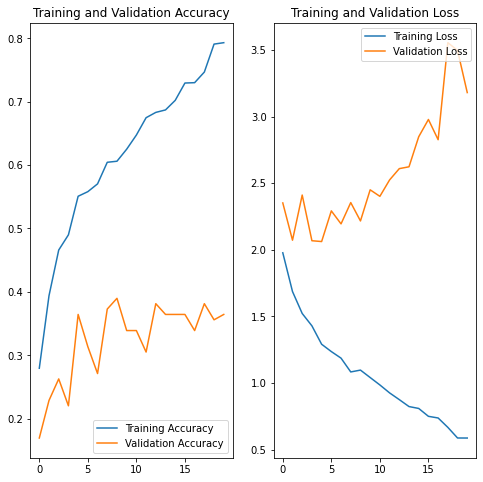

In [16]:
# Graphs
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### **Question**:
Write your findings after the model fit, see if there is an evidence of model overfit or underfit

**Overfitting Model** The model  is overfitting as the Training Accuracy has increased to 72.35% while validation accuracy is lingering around 30%.  

## Data augmentation

Overfitting generally occurs when there are a small number of training examples. [Data augmentation](https://www.tensorflow.org/tutorials/images/data_augmentation) takes the approach of generating additional training data from your existing examples by augmenting them using random transformations that yield believable-looking images. This helps expose the model to more aspects of the data and generalize better.

In [17]:
# After you have analysed the model fit history for presence of underfit or overfit, choose an appropriate data augumentation strategy. 

data_augmentation = keras.Sequential(
  [
    layers.experimental.preprocessing.RandomFlip("horizontal", 
                                                 input_shape=(img_height, 
                                                              img_width,
                                                              3)),
    layers.experimental.preprocessing.RandomRotation(0.1),
    layers.experimental.preprocessing.RandomZoom(0.1),
  ]
)

Let's visualize what a few augmented examples look like by applying data augmentation to the same image several times

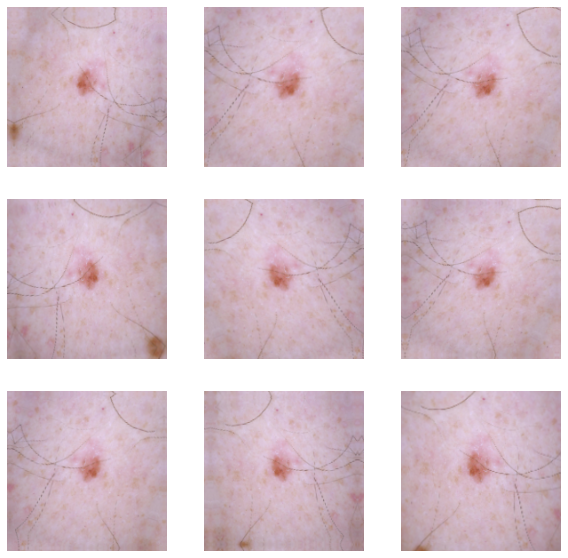

In [18]:
# Visualizing how the augmentation strategy works for one instance of training image.

plt.figure(figsize=(10, 10))
for images, _ in train_ds.take(1):
  for i in range(9):
    augmented_images = data_augmentation(images)
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(augmented_images[0].numpy().astype("uint8"))
    plt.axis("off")

#### **Task 6: Create, compile and train the model**

Model Definition

In [19]:
## Your code goes here
## You should also include dropouts to tackle with overfitting. (compulsory)
### Your code goes here
model = Sequential([data_augmentation])

# Rescaling Layer
model.add(tf.keras.layers.experimental.preprocessing.Rescaling(1./255, input_shape=(180, 180, 3)))

# Convolution and Pooling layers
model.add(layers.Conv2D(32, (3, 3), strides=(3,3), padding='valid', activation='relu'))
model.add(layers.Conv2D(64, (3, 3), strides=(3,3), padding='valid',activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.25))

# Flattening and Dense layers
model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dropout(0.5))
# Adding the output layer
model.add(layers.Dense(10, activation='softmax'))

# Model summary
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_1 (Sequential)   (None, 180, 180, 3)       0         
                                                                 
 rescaling_1 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 32)        896       
                                                                 
 conv2d_3 (Conv2D)           (None, 20, 20, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 10, 10, 64)       0         
 2D)                                                             
                                                                 
 dropout (Dropout)           (None, 10, 10, 64)        0         
                                                      

Compiling the model

In [20]:
## Your code goes here
### Choose an appropirate optimiser and loss function
model.compile(optimizer = 'adam',
              loss = keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])


Training the model

In [21]:
# Note: Train your model for 20 epochs
## Your code goes here

epochs = 20

history = model.fit(
  train_ds,
  validation_data = val_ds,
  epochs=epochs
)

Epoch 1/20


/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


56/56 [==============================] - 2s 15ms/step - loss: 2.1047 - accuracy: 0.1875 - val_loss: 2.2798 - val_accuracy: 0.0932
Epoch 2/20
56/56 [==============================] - 1s 10ms/step - loss: 1.9279 - accuracy: 0.2879 - val_loss: 2.1247 - val_accuracy: 0.1949
Epoch 3/20
56/56 [==============================] - 1s 10ms/step - loss: 1.7745 - accuracy: 0.3566 - val_loss: 2.2738 - val_accuracy: 0.2373
Epoch 4/20
56/56 [==============================] - 1s 10ms/step - loss: 1.7014 - accuracy: 0.4001 - val_loss: 1.9813 - val_accuracy: 0.2797
Epoch 5/20
56/56 [==============================] - 1s 10ms/step - loss: 1.5366 - accuracy: 0.4660 - val_loss: 2.0721 - val_accuracy: 0.3136
Epoch 6/20
56/56 [==============================] - 1s 10ms/step - loss: 1.5015 - accuracy: 0.4766 - val_loss: 2.0608 - val_accuracy: 0.3475
Epoch 7/20
56/56 [==============================] - 1s 10ms/step - loss: 1.4777 - accuracy: 0.4805 - val_loss: 2.1011 - val_accuracy: 0.3305
Epoch 8/20
56/56 [======

#### Visualizing the results

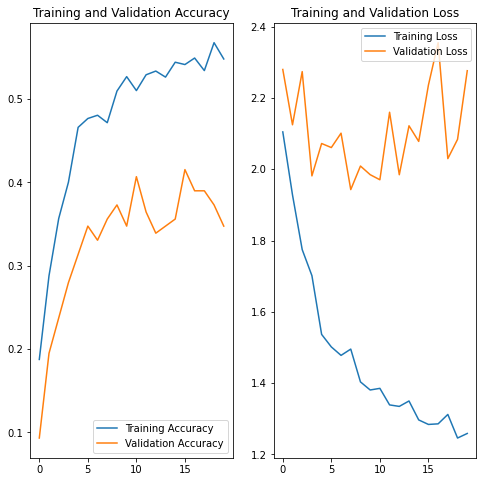

In [22]:
# Graphs
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### **Question**:
Write your findings after the model fit, see if there is an evidence of model overfit or underfit. Do you think there is some improvement now as compared to the previous model run?

The overfitting has considerable gone down when we added preprocessing data augmentation layer and multiple  dropout layer for the changes.

## Distribution in the dataset

**Context:** Many times real life datasets can have class imbalance, one class can have proportionately higher number of samples compared to the others. Class imbalance can have a detrimental effect on the final model quality. Hence as a sanity check it becomes important to check what is the distribution of classes in the data.

<br>

#### **Task 7: Find the distribution of classes in the training dataset.**

<Figure size 720x720 with 0 Axes>

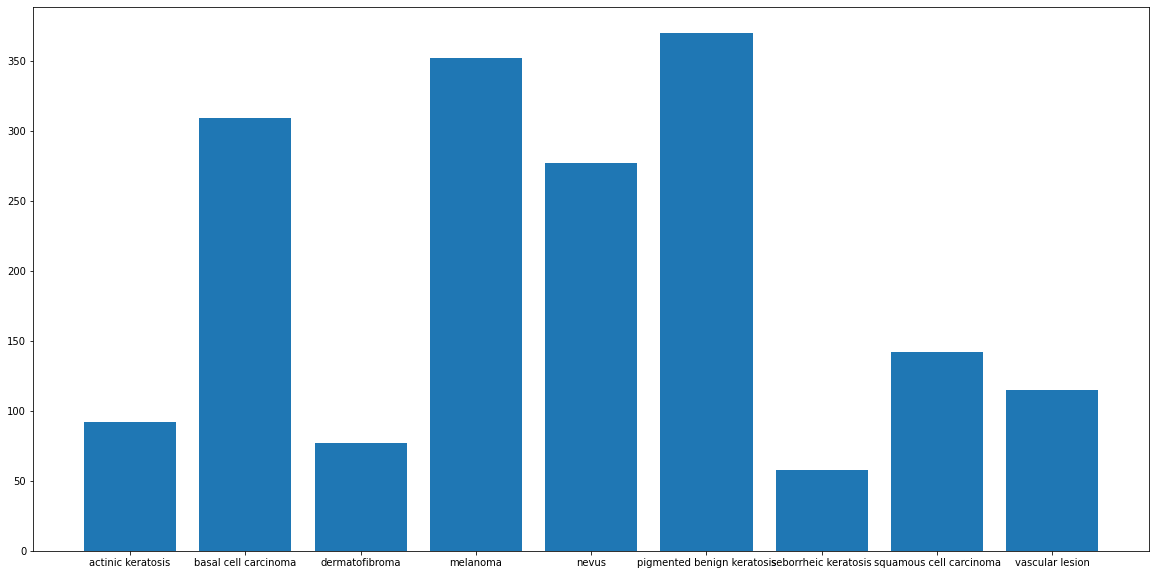

actinic keratosis
92
basal cell carcinoma
309
dermatofibroma
77
melanoma
352
nevus
277
pigmented benign keratosis
370
seborrheic keratosis
58
squamous cell carcinoma
142
vascular lesion
115


In [23]:
## Your code goes here.


imbalanceDict = dict()

for i in class_names:
  imbalanceDict[i] = []

plt.figure(figsize=(10, 10))

for imgs, lbls in train_ds:
  for i in range(32):
    imbalanceDict[class_names[lbls[i]]].append(imgs[i].numpy().astype("uint8"))

for i in imbalanceDict:
  imbalanceDict[i] = len(imbalanceDict[i]) 

fig = plt.figure()
fig.set_figwidth(20)
fig.set_figheight(10)

plt.bar(range(len(imbalanceDict)), list(imbalanceDict.values()), align='center')
plt.xticks(range(len(imbalanceDict)), list(imbalanceDict.keys()))
plt.show()

for i in class_names:
  print(i)
  print(imbalanceDict[i])

#### **Questions:**  
 - Which class has the least number of samples?
 - Which classes dominate the data in terms proportionate number of samples?


*Which class has the least number of samples?* **seborrheic keratosis**
<br/>*Which classes dominate the data in terms proportionate number of samples?* **pigmented benign keratosis**

#### **Task 8: Rectifying the class imbalance**
You can use a python package known as `Augmentor` (https://augmentor.readthedocs.io/en/master/) to add more samples across all classes so that none of the classes have very few samples.

In [24]:
!pip install Augmentor

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


To use `Augmentor`, the following general procedure is followed:

1. Instantiate a `Pipeline` object pointing to a directory containing your initial image data set.<br>
2. Define a number of operations to perform on this data set using your `Pipeline` object.<br>
3. Execute these operations by calling the `Pipeline’s` `sample()` method.


In [27]:
# Provide the path for the training dataset
print(type(data_dir_train))
path_to_training_dataset =  "Skin cancer ISIC The International Skin Imaging Collaboration/Train/"
import Augmentor
for i in class_names:
    p = Augmentor.Pipeline(path_to_training_dataset + i)
    p.rotate(probability=0.7, max_left_rotation=10, max_right_rotation=10)
    p.sample(500)
    ## We are adding 500 samples per class to make sure that none of the classes are sparse.

<class 'pathlib.PosixPath'>
Initialised with 114 image(s) found.
Output directory set to Skin cancer ISIC The International Skin Imaging Collaboration/Train/actinic keratosis/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x7FEFC654D250>: 100%|██████████| 500/500 [00:08<00:00, 60.33 Samples/s] 


Initialised with 376 image(s) found.
Output directory set to Skin cancer ISIC The International Skin Imaging Collaboration/Train/basal cell carcinoma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7FEFC64D8610>: 100%|██████████| 500/500 [00:08<00:00, 60.81 Samples/s] 


Initialised with 95 image(s) found.
Output directory set to Skin cancer ISIC The International Skin Imaging Collaboration/Train/dermatofibroma/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x7FEFC6574150>: 100%|██████████| 500/500 [00:08<00:00, 59.85 Samples/s] 


Initialised with 438 image(s) found.
Output directory set to Skin cancer ISIC The International Skin Imaging Collaboration/Train/melanoma/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=1024x768 at 0x7FEFC67C8290>: 100%|██████████| 500/500 [00:40<00:00, 12.42 Samples/s]


Initialised with 357 image(s) found.
Output directory set to Skin cancer ISIC The International Skin Imaging Collaboration/Train/nevus/output.

Processing <PIL.Image.Image image mode=RGB size=919x802 at 0x7FEFC6A2A710>: 100%|██████████| 500/500 [00:41<00:00, 12.12 Samples/s]


Initialised with 462 image(s) found.
Output directory set to Skin cancer ISIC The International Skin Imaging Collaboration/Train/pigmented benign keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7FEFC6543810>: 100%|██████████| 500/500 [00:08<00:00, 59.85 Samples/s] 


Initialised with 77 image(s) found.
Output directory set to Skin cancer ISIC The International Skin Imaging Collaboration/Train/seborrheic keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=1024x768 at 0x7FEFC1BA9B90>: 100%|██████████| 500/500 [00:19<00:00, 25.41 Samples/s]


Initialised with 181 image(s) found.
Output directory set to Skin cancer ISIC The International Skin Imaging Collaboration/Train/squamous cell carcinoma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7FEFC655FE50>: 100%|██████████| 500/500 [00:08<00:00, 61.36 Samples/s] 


Initialised with 139 image(s) found.
Output directory set to Skin cancer ISIC The International Skin Imaging Collaboration/Train/vascular lesion/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7FEFC6580490>: 100%|██████████| 500/500 [00:08<00:00, 60.97 Samples/s] 


Augmentor has stored the augmented images in the output sub-directory of each of the sub-directories of skin cancer types. Lets take a look at total count of augmented images.

In [28]:
# Count of images under each class after addition
image_count_train = len(list(data_dir_train.glob('*/output/*.jpg')))
print(image_count_train)

4500


Lets see the distribution of augmented data after adding new images to the original training data.

In [ ]:
path_list = [x for x in glob(os.path.join(data_dir_train, '*','output', '*.jpg'))]
path_list

In [ ]:
lesion_list_new = [os.path.basename(os.path.dirname(os.path.dirname(y))) for y in glob(os.path.join(data_dir_train, '*','output', '*.jpg'))]
lesion_list_new

In [ ]:
dataframe_dict_new = dict(zip(path_list_new, lesion_list_new))

In [ ]:
df2 = pd.DataFrame(list(dataframe_dict_new.items()),columns = ['Path','Label'])
new_df = original_df.append(df2)

In [ ]:
new_df['Label'].value_counts()

So, now we have added 500 images to all the classes to maintain some class balance. We can add more images as we want to improve training process.

### **Task 9: Repeating the steps for balanced augmented data**

In [ ]:
batch_size = 32
img_height = 180
img_width = 180

**Create a training dataset**

In [ ]:
# Provide the path here
data_dir_train="path to directory with training data + data created using augmentor"

# Provide the subset value here
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,
  subset = ## Choose the correct parameter value, so that only training data is refered to,
  image_size=(img_height, img_width),
  batch_size=batch_size)

**Create a validation dataset**

In [ ]:
# Provide the subset value here
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,
  subset = ## Choose the correct parameter value, so that only validation data is refered to,
  image_size=(img_height, img_width),
  batch_size=batch_size)

**Create your model (make sure to include normalization)**

In [ ]:
## Your code goes here


**Compile your model (Choose optimizer and loss function appropriately)**

In [ ]:
## Your code goes here


**Train your model**

In [ ]:
# Note: Train your model for 30 epochs
## Your code goes here

history = # Code

**Visualize the model results**

In [ ]:
# Graphs
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

### **Task 10: Analyzing the results** 


#### **Question:**
- Did you get rid of underfitting/overfitting from the model? 
- Did class rebalance help in the process?


`< Double click on the cell to write your answer here.>`